In [34]:
import numpy as np
import matplotlib.pyplot as plt

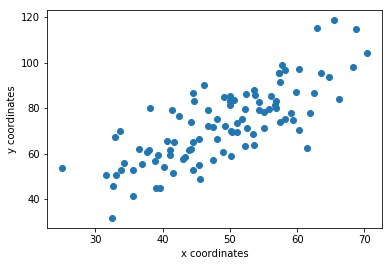

In [35]:
# read data and parse it
data = np.genfromtxt('./datasets/lin_reg_univariate.csv', delimiter=',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
ones = np.ones((x.shape[0], 1))
x = np.concatenate([ones, x], 1)
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.scatter(data[:, 0].reshape(-1, 1), y)

In [36]:
# Hyperparameters
epochs = 1000 # number of time steps
learning_rate = 0.0001 # sensitivity between time steps

In [37]:
# estimates are of the form (m, b) in y = mx + b
def calculateError(x, y, estimates):
    y_hat = x @ estimates.T
    return ((y - y_hat) ** 2).mean()

def gradientDescent(x, y, estimates, learning_rate, epochs):
    for epoch in range(epochs):
        y_hat = x @ estimates.T
        # instantaneous increase in error = 2 * x_i * (y - y_hat)
        change = (2 * x * (y - y_hat)).mean(axis=0)
        estimates = estimates + learning_rate * change
        estimates = estimates - (learning_rate/len(x)) * \
            np.sum((x @ estimates.T - y) * x, axis=0)
        error = calculateError(x, y, estimates)
    return (estimates, error)

In [38]:
estimates = np.ones((1, 2))
estimates, error = gradientDescent(x, y, estimates, learning_rate, epochs)
print(estimates, error)

[[1.08763629 1.45811495]] 112.05658165008981


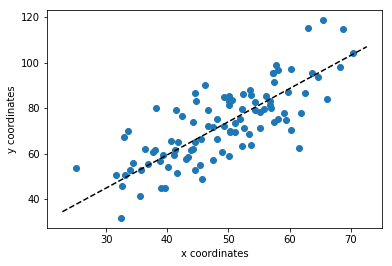

In [39]:
plt.scatter(data[:, 0].reshape(-1, 1), y)
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = estimates[0][0] + estimates[0][1] * x_vals #the line equation
plt.plot(x_vals, y_vals, 'k--')